In [1]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animal-image-dataset-90-different-animals


In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [3]:
#
physical_devices=tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices)>0:
  tf.config.experimental.set_memory_growth(physical_devices[0],True)
  print("gpu is being used")
else:
  print("gpu is not being used")

gpu is being used


In [4]:
dataset_path="/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"
classes=os.listdir(dataset_path)
num_classes=len(classes)
print(f"numbr of classes:{num_classes}")
print(f"classes:{classes}")

numbr of classes:90
classes:['beetle', 'parrot', 'fox', 'wolf', 'hedgehog', 'turtle', 'snake', 'shark', 'horse', 'antelope', 'hamster', 'woodpecker', 'eagle', 'chimpanzee', 'bison', 'penguin', 'butterfly', 'sandpiper', 'hornbill', 'lion', 'lobster', 'oyster', 'otter', 'grasshopper', 'raccoon', 'dog', 'pigeon', 'donkey', 'hippopotamus', 'hummingbird', 'bear', 'coyote', 'bee', 'pig', 'rat', 'owl', 'caterpillar', 'koala', 'squid', 'hare', 'whale', 'mouse', 'tiger', 'fly', 'lizard', 'orangutan', 'bat', 'porcupine', 'kangaroo', 'gorilla', 'starfish', 'mosquito', 'crow', 'possum', 'goldfish', 'swan', 'elephant', 'sheep', 'dragonfly', 'zebra', 'seal', 'octopus', 'cow', 'ox', 'wombat', 'reindeer', 'panda', 'duck', 'goose', 'goat', 'badger', 'flamingo', 'crab', 'seahorse', 'rhinoceros', 'dolphin', 'okapi', 'moth', 'sparrow', 'pelecaniformes', 'squirrel', 'leopard', 'jellyfish', 'ladybugs', 'cockroach', 'hyena', 'cat', 'deer', 'turkey', 'boar']


<function matplotlib.pyplot.show(close=None, block=None)>

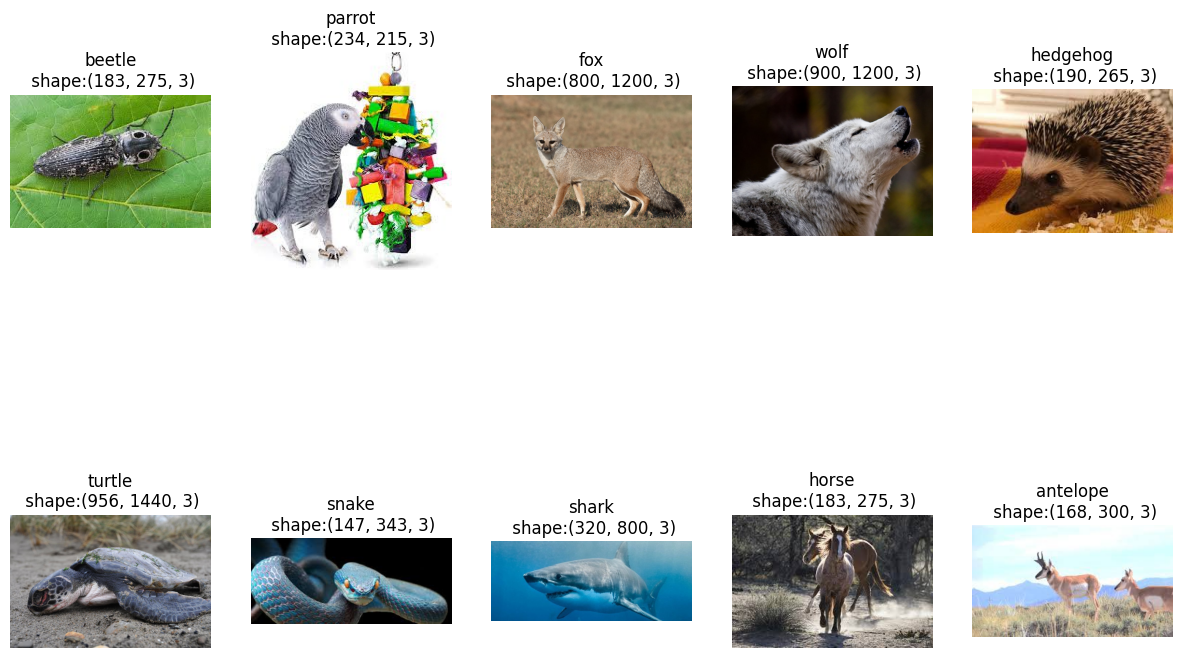

In [5]:
plt.figure(figsize=(15,10))
for i,class_name in enumerate(classes[:10]):
  class_path=os.path.join(dataset_path,class_name)
  img_name=os.listdir(class_path)[0]
  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)
  plt.subplot(2,5,i+1)
  plt.imshow(img)
  plt.title(f'{class_name}\n shape:{img.shape}')
  plt.axis('off')
plt.show

In [8]:
img_size=(224,224)
batch_size=64
datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)
train_generator=datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)
validation_generator=datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

Found 4860 images belonging to 90 classes.
Found 540 images belonging to 90 classes.


In [9]:
class_indices=train_generator.class_indices
print(class_indices)
class_names=list(class_indices.keys())
print(class_names)

{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67, 'rat': 68, 'reindeer': 69, 'rhinoceros': 

In [22]:
# Load MobileNetV2 as the base model

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the base model weights, training
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x) # output layer

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
# Model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,661,978 (13.97 MB)

 Trainable params: 1,403,994 (5.36 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [24]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs = 20

)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
  76/4860 ━━━━━━━━━━━━━━━━━━━━ 1:05:49 826ms/step - accuracy: 0.0473 - loss: 4.5253

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4860/4860 ━━━━━━━━━━━━━━━━━━━━ 85s 15ms/step - accuracy: 0.1057 - loss: 4.1642 - val_accuracy: 0.5488 - val_loss: 3.1720
Epoch 2/20
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.4694 - loss: 2.6682 - val_accuracy: 0.7383 - val_loss: 1.8034
Epoch 3/20
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - accuracy: 0.6692 - loss: 1.6085 - val_accuracy: 0.8203 - val_loss: 1.1297
Epoch 4/20
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.7467 - loss: 1.1101 - val_accuracy: 0.8262 - val_loss: 0.9038
Epoch 5/20
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - accuracy: 0.7911 - loss: 0.8786 - val_accuracy: 0.8398 - val_loss: 0.7745
Epoch 6/20
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - accuracy: 0.8277 - loss: 0.7033 - val_accuracy: 0.8340 - val_loss: 0.6933
Epoch 7/20
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.8516 - loss: 0.6116 - val_accuracy: 0.8438 - val_loss: 0.6608
Epoch 8/20
4860/4860 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - accuracy: 0.8717 - loss: 0.5117 - va

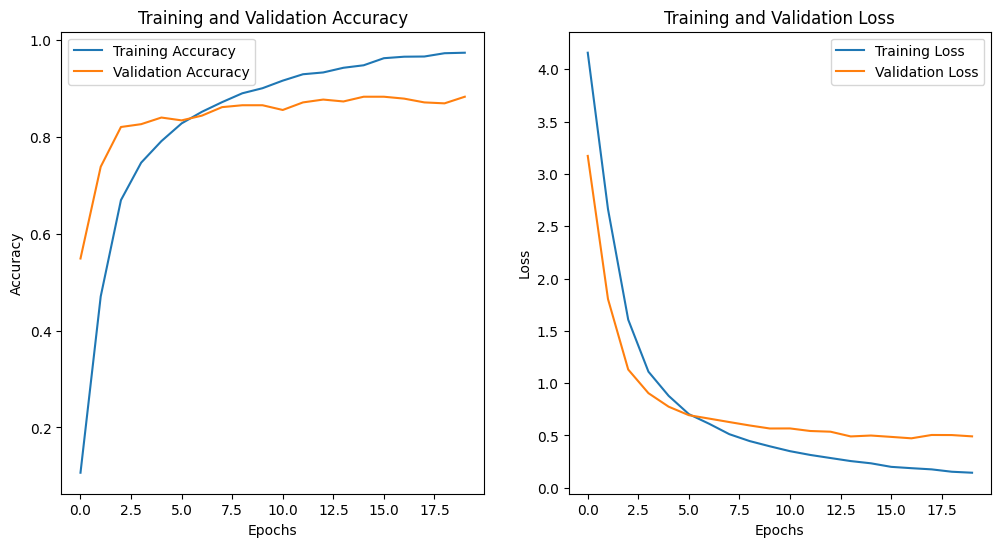

In [25]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 846ms/step - accuracy: 0.8852 - loss: 0.4948
Validation Loss: 0.48275870084762573
Validation Accuracy: 0.885185182094574


In [27]:
model.save("MCAR.keras")

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('MCAR.keras')

def predict_animal(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

In [31]:
os.listdir('/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/')

['beetle',
 'parrot',
 'fox',
 'wolf',
 'hedgehog',
 'turtle',
 'snake',
 'shark',
 'horse',
 'antelope',
 'hamster',
 'woodpecker',
 'eagle',
 'chimpanzee',
 'bison',
 'penguin',
 'butterfly',
 'sandpiper',
 'hornbill',
 'lion',
 'lobster',
 'oyster',
 'otter',
 'grasshopper',
 'raccoon',
 'dog',
 'pigeon',
 'donkey',
 'hippopotamus',
 'hummingbird',
 'bear',
 'coyote',
 'bee',
 'pig',
 'rat',
 'owl',
 'caterpillar',
 'koala',
 'squid',
 'hare',
 'whale',
 'mouse',
 'tiger',
 'fly',
 'lizard',
 'orangutan',
 'bat',
 'porcupine',
 'kangaroo',
 'gorilla',
 'starfish',
 'mosquito',
 'crow',
 'possum',
 'goldfish',
 'swan',
 'elephant',
 'sheep',
 'dragonfly',
 'zebra',
 'seal',
 'octopus',
 'cow',
 'ox',
 'wombat',
 'reindeer',
 'panda',
 'duck',
 'goose',
 'goat',
 'badger',
 'flamingo',
 'crab',
 'seahorse',
 'rhinoceros',
 'dolphin',
 'okapi',
 'moth',
 'sparrow',
 'pelecaniformes',
 'squirrel',
 'leopard',
 'jellyfish',
 'ladybugs',
 'cockroach',
 'hyena',
 'cat',
 'deer',
 'turkey',

In [32]:
os.listdir('/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/elephant/')

['18d2849164.jpg',
 '4cccdaa27d.jpg',
 '6d07c435dd.jpg',
 '032ef781ef.jpg',
 '3c9d9b5adf.jpg',
 '8d9950ed68.jpg',
 '5e67ac6642.jpg',
 '0ac6979eca.jpg',
 '43b74457d1.jpg',
 '7ff62f898d.jpg',
 '5edec096c0.jpg',
 '0c57e72045.jpg',
 '4dacf9a3f0.jpg',
 '70c11aab2e.jpg',
 '2cb580feff.jpg',
 '79fbd8424b.jpg',
 '8ee3b0e5f5.jpg',
 '27f0f7f555.jpg',
 '8a24e8d62a.jpg',
 '48fe954ed2.jpg',
 '6ecfd5e88c.jpg',
 '55ec112288.jpg',
 '75fefe8441.jpg',
 '3c82e731e0.jpg',
 '5b37e80a84.jpg',
 '0f3f8d6a15.jpg',
 '8c2d171b9d.jpg',
 '1aac205025.jpg',
 '26d834d229.jpg',
 '12b9c94601.jpg',
 '9f23f879e5.jpg',
 '4a291fe31f.jpg',
 '40dc2cedec.jpg',
 '6c28066ea3.jpg',
 '5f9155af55.jpg',
 '2c4dcd1d1e.jpg',
 '57ab95b826.jpg',
 '4f76a2f076.jpg',
 '27d28e5d8b.jpg',
 '3eea4b31c6.jpg',
 '9b05a25de1.jpg',
 '31c31736c6.jpg',
 '6d8a9a8f8f.jpg',
 '0e757af2d5.jpg',
 '16d29a1dc0.jpg',
 '72c584b509.jpg',
 '5c8e73a595.jpg',
 '4f7dce13d9.jpg',
 '66ca05ab12.jpg',
 '24dd5cb3a6.jpg',
 '10ee8625c0.jpg',
 '5d7d178594.jpg',
 '1d84834b1a

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


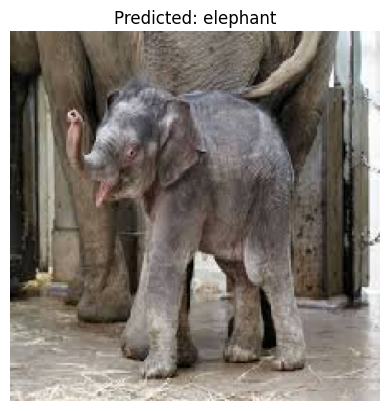

In [33]:
predict_animal('/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/elephant/5d7d178594.jpg')